In [1]:
import os
import random
import torch
import numpy as np
import pickle as pkl
from analysis import *
import argparse
from sys import platform

In [2]:
torch.manual_seed(12)
torch.cuda.manual_seed(12)
np.random.seed(12)
torch.backends.cudnn.deterministics = True
torch.set_num_threads(1)

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())


print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
NVIDIA TITAN V


In [4]:
# iv: image option
length = 440
channel = 128
min_CNN = 200
n_classes = 40
classes = range(n_classes)


In [5]:
if platform == "linux" or platform == "linux2":
    torch_models_dir = r"/media/titan/AI Research1/Data/CVPR2017"
elif platform == "win32":
    torch_models_dir = r"D:\Data\CVPR2021-02785\CVPR2021-02785\preprocessed\torch_models"
block_splits_all, block_splits_single, eeg_14_70, eeg_55_95, eeg_5_95, eeg_raw = os.listdir(torch_models_dir)
print(os.listdir(torch_models_dir))

['block_splits_by_image_all.pth', 'block_splits_by_image_single.pth', 'eeg_14_70_std.pth', 'eeg_55_95_std.pth', 'eeg_5_95_std.pth', 'eeg_signals_raw_with_mean_std.pth']


In [6]:
eeg_dataset = os.path.join(torch_models_dir, eeg_55_95)
splits_all_path = os.path.join(torch_models_dir, block_splits_all)
splits_single_path = os.path.join(torch_models_dir, block_splits_single)
# splits_path = os.path.join(torch_models_dir, splits_shuffled_path)
print(eeg_dataset,'\n', splits_all_path, '\n', splits_single_path)

/media/titan/AI Research1/Data/CVPR2017/eeg_55_95_std.pth 
 /media/titan/AI Research1/Data/CVPR2017/block_splits_by_image_all.pth 
 /media/titan/AI Research1/Data/CVPR2017/block_splits_by_image_single.pth


In [7]:
splits_all = torch.load(splits_all_path)
splits_single = torch.load(splits_single_path)

In [8]:
print(len(splits_all['splits']))
print(len(splits_all['splits'][0]))

print(len(splits_all['splits'][5]['train']))
print(len(splits_all['splits'][5]['val']))
print(len(splits_all['splits'][5]['test']))
print(splits_all['splits'][0]['train'][:40])
print(splits_all['splits'][1]['train'][:40])
print(splits_all['splits'][2]['train'][:10])
print(splits_all['splits'][3]['train'][:10])


6
3
7984
1996
1985
[0, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 29, 33, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 51, 52, 54, 55]
[1, 2, 3, 4, 6, 8, 9, 12, 13, 20, 25, 26, 27, 28, 30, 32, 33, 35, 37, 38, 39, 40, 44, 45, 46, 50, 52, 54, 56, 58, 59, 60, 62, 65, 68, 72, 73, 74, 76, 81]
[2, 3, 4, 5, 6, 7, 8, 10, 11, 13]
[1, 2, 4, 7, 9, 10, 12, 13, 14, 15]


In [9]:
# print(splits_single)
print(len(splits_single['splits'][0]['train']))
print(len(splits_single['splits'][0]['val']))
print(len(splits_single['splits'][0]['test']))

669
167
164


In [10]:
eeg_loaded = torch.load(eeg_dataset)

In [11]:
print(len(eeg_loaded))
print(eeg_loaded.keys())
dataset, labels, images = [eeg_loaded[k] for k in eeg_loaded.keys()]
print(len(labels))
print(len(images))
print(len(dataset))

print(labels)
print(images[0])
print(dataset[0]['eeg'].shape)
print(dataset[0])

3
dict_keys(['dataset', 'labels', 'images'])
40
1996
11965
['n02389026', 'n03888257', 'n03584829', 'n02607072', 'n03297495', 'n03063599', 'n03792782', 'n04086273', 'n02510455', 'n11939491', 'n02951358', 'n02281787', 'n02106662', 'n04120489', 'n03590841', 'n02992529', 'n03445777', 'n03180011', 'n02906734', 'n07873807', 'n03773504', 'n02492035', 'n03982430', 'n03709823', 'n03100240', 'n03376595', 'n03877472', 'n03775071', 'n03272010', 'n04069434', 'n03452741', 'n03792972', 'n07753592', 'n13054560', 'n03197337', 'n02504458', 'n02690373', 'n03272562', 'n04044716', 'n02124075']
n02951358_31190
torch.Size([128, 500])
{'eeg': tensor([[-2.9181e-02, -2.9862e-01, -5.1430e-01,  ..., -8.4631e-01,
         -4.8041e-01, -2.8394e-02],
        [-2.4111e-02, -1.6960e-01, -2.8707e-01,  ..., -5.6212e-01,
         -3.2735e-01, -3.5872e-02],
        [ 4.7802e-02,  3.7646e-01,  6.4149e-01,  ...,  4.3011e-01,
          2.4678e-01,  4.1414e-02],
        ...,
        [ 2.1368e-02,  1.2907e-01,  1.9428e-01,  ..

In [16]:
opt = {
    # Dataset options
#     "iv": "image",
#     "offset": None,
    "results_file": "results.pkl",
    "subject": 0,
    "time_low": 20,
    "time_high": 460,
#     "run": "none",
    "eeg_dataset": eeg_dataset,
    "model_type": "model10",
    "splits_path": splits_all_path,
    "split_num": 0,
    "split_name": "train",
#     "fold": 5,
    #Training options
    "batch_size": 16,
    "optim": "Adam",
    "learning_rate": 0.001,
    "learning_rate_decay_by": 0.5,
    "learning_rate_decay_every": 10,
    "epochs": 200,
    "GPUindex": 0,
    "kind":"from-scratch",
    #Backend options
    "no_cuda": False,
    "classifier": None
}
opt = argparse.Namespace(**opt)
print(opt.time_low)

20


In [20]:
%load_ext autoreload
%autoreload 2
from torch.utils.data import DataLoader
# from data_loader import EEGDataset, Splitter, SplitterWithData
from data_loader_CVPR2017 import EEGDataset, Splitter
from EEG_Encoder.LSTM import classifier_LSTM
from EEG_Encoder.CNN import classifier_CNN
from EEG_Encoder.EEGNet import classifier_EEGNet
from EEG_Encoder.SyncNet import classifier_SyncNet
from EEG_Encoder.EEGChannelNet import classifier_EEGChannelNet
from EEG_Encoder.net_generator import Classifier
from EEG_Encoder.net_trainer import net_trainer
import matplotlib.pyplot as plt
from p_values import *
from torchinfo import summary

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
def load_dataset(
#              offset,
             eeg_dataset,
             splits_path,
             split_num, # (0-5) - 6 fold cross validation
             split_name,
#              total, 
#              classes,
#              classifier,
             batch_size,
#              GPUindex,
#              length, # 500
#              channel, # 128
#              min_CNN,
             opt,
             kind="from-scratch"):        
    # Load dataset
    dataset = EEGDataset(opt, eeg_dataset)
    print("DONE: LOAD DATASET")
#     # Create loaders for LSTM/MLP/CNN/SCNN/EEGNet/SyncNet/EEGChannelNet
#     if kind=="from-scratch":
#         relabel = False
#     if kind=="incremental":
#         relabel = False
#     if kind=="no-model-file":
#         relabel = True
    splitter = {split: Splitter(dataset,
                    splits_path,
                    split_num,
                    split_name = split) for split in ["train", "val", "test"]}
    loaders = {split: DataLoader(
                        splitter[split],
                        batch_size = batch_size,
                        drop_last = False,
                        shuffle = True)
                    for split in ["train", "val", "test"]}
    channel_idx = None    
    print("DONE: Create loaders for model")            
    return dataset, loaders, splitter

In [22]:
# Options
opt.classifier = "EEGNet"
opt.batch_size = 16
# opt.kind = "from-scratch"
# opt.run = "imagenet40-1000"
# opt.fold = 5

In [23]:
dataset, loaders, splitter = load_dataset(
#              offset,
             opt.eeg_dataset,
             opt.splits_path,
             opt.split_num, # (0-5) - 6 fold cross validation
             opt.split_name,
#              total, 
#              classes,
#              classifier,
             opt.batch_size,
#              GPUindex,
#              length, # 500
#              channel, # 128
#              min_CNN,
             opt,
             opt.kind)

DONE: LOAD DATASET
DONE: Create loaders for model


In [24]:
# loaders: divide the splits data in each fold with batch_size
# Each fold has {train: 8000 idx, val: 2000 idx, test: 2000 idx}
# Each loader batch has {train: 2000 idx, val: 250 idx, test: 250 idx}
print(type(dataset))
print(type(loaders))
print(len(loaders), [len(loaders[name]) for name in ["train", "val", "test"] ])
for i, (input, target) in enumerate(loaders["train"]):
    if i<20:
        print(f"{i+1}: Target size: {target.size()}; input size: {input.size()}")
for i in range(0, 40):
    eeg, label_val = splitter["val"][i]
    eeg, label_train = splitter["train"][i]
    print(f"{i+1}: Label val: {label_val}; label train: {label_train}")


<class 'data_loader_CVPR2017.EEGDataset'>
<class 'dict'>
3 [498, 125, 125]
1: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
2: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
3: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
4: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
5: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
6: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
7: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
8: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
9: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
10: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
11: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
12: Target size: torch.Size([16]); input size: torch.Size([16, 128, 440])
13: Target size: torch.Size([16]); input size:

In [25]:
net, nonclasses = Classifier(
                 n_classes,
                 classes,
                 opt.classifier,
                 opt.GPUindex,
                 length,
                 channel,
                 min_CNN,
                 opt.kind)
# print(len(nonclasses))
summary(net, input_size=(1,128, 440))

DONE: CREATE TORCH CLASSIFIER
classifier_EEGNet(
  (network): Sequential(
    (0): ZeroPad2d((110, 109, 0, 0))
    (1): Conv2d(1, 8, kernel_size=(1, 220), stride=(1, 1))
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(128, 1), stride=(1, 1), groups=8)
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ELU(alpha=1.0)
    (6): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
    (7): Dropout(p=0.5, inplace=False)
    (8): ZeroPad2d((8, 7, 0, 0))
    (9): Conv2d(16, 16, kernel_size=(1, 16), stride=(1, 1), groups=8)
    (10): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
    (11): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ELU(alpha=1.0)
    (13): AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0)
    (14): Dropout(p=0.5, inplace=False)
  )
  (fc): Linear(in_features=208, out_features=40, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
classifier_EEGNet                        [1, 40]                   --
├─Sequential: 1-1                        [1, 16, 1, 13]            --
│    └─ZeroPad2d: 2-1                    [1, 1, 128, 659]          --
│    └─Conv2d: 2-2                       [1, 8, 128, 440]          1,768
│    └─BatchNorm2d: 2-3                  [1, 8, 128, 440]          16
│    └─Conv2d: 2-4                       [1, 16, 1, 440]           2,064
│    └─BatchNorm2d: 2-5                  [1, 16, 1, 440]           32
│    └─ELU: 2-6                          [1, 16, 1, 440]           --
│    └─AvgPool2d: 2-7                    [1, 16, 1, 110]           --
│    └─Dropout: 2-8                      [1, 16, 1, 110]           --
│    └─ZeroPad2d: 2-9                    [1, 16, 1, 125]           --
│    └─Conv2d: 2-10                      [1, 16, 1, 110]           528
│    └─Conv2d: 2-11                      [1, 16, 1, 110]           272
│    └─

In [28]:
model_path = (   opt.classifier+
                  "-"+
                  str(length)+
                  "-"+
                  str(channel) +"_55_95" )
results_path = (  "results_"+ opt.classifier+
                  "-"+
                  str(length)+
                  "-"+
                  str(channel)+ "_55_95")
print(model_path)
print(results_path)

EEGNet-440-128_55_95
results_EEGNet-440-128_55_95


In [29]:
print(opt)

Namespace(results_file='results.pkl', subject=0, time_low=20, time_high=460, eeg_dataset='/media/titan/AI Research1/Data/CVPR2017/eeg_55_95_std.pth', model_type='model10', splits_path='/media/titan/AI Research1/Data/CVPR2017/block_splits_by_image_all.pth', split_num=0, split_name='train', batch_size=16, optim='Adam', learning_rate=0.001, learning_rate_decay_by=0.5, learning_rate_decay_every=10, epochs=200, GPUindex=0, kind='from-scratch', no_cuda=False, classifier='EEGNet')


In [30]:
channel_idx=None
non_classes=None
if opt.kind=="from-scratch":
    results = net_trainer(
            net,
            loaders,
            opt,
            channel_idx,
            nonclasses,
            None,
            True,
            model_path)

Epoch 1
Train Batch 100 (every 100 batch): Loss=3.6977; accuracy=0.0281
Train Batch 200 (every 100 batch): Loss=3.6820; accuracy=0.0284
Train Batch 300 (every 100 batch): Loss=3.6094; accuracy=0.0290
Train Batch 400 (every 100 batch): Loss=3.6907; accuracy=0.0314
Epoch 1 summary: train_loss: 3.6458 | train_acc: 0.0338 | val_loss: 3.4545 | val_acc: 0.0498
Epoch 2
Train Batch 100 (every 100 batch): Loss=3.3730; accuracy=0.0569
Train Batch 200 (every 100 batch): Loss=3.4399; accuracy=0.0534
Train Batch 300 (every 100 batch): Loss=3.0698; accuracy=0.0535
Train Batch 400 (every 100 batch): Loss=3.3235; accuracy=0.0555
Epoch 2 summary: train_loss: 3.3301 | train_acc: 0.0583 | val_loss: 3.1289 | val_acc: 0.0685
Epoch 3
Train Batch 100 (every 100 batch): Loss=3.0280; accuracy=0.0744
Train Batch 200 (every 100 batch): Loss=2.9668; accuracy=0.0809
Train Batch 300 (every 100 batch): Loss=2.9207; accuracy=0.0842
Train Batch 400 (every 100 batch): Loss=3.2098; accuracy=0.0875
Epoch 3 summary: train

Train Batch 100 (every 100 batch): Loss=2.2113; accuracy=0.2394
Train Batch 200 (every 100 batch): Loss=2.1671; accuracy=0.2297
Train Batch 300 (every 100 batch): Loss=2.1740; accuracy=0.2310
Train Batch 400 (every 100 batch): Loss=2.1619; accuracy=0.2381
Epoch 24 summary: train_loss: 2.2278 | train_acc: 0.2369 | val_loss: 2.0362 | val_acc: 0.2759
Epoch 25
Train Batch 100 (every 100 batch): Loss=1.8521; accuracy=0.2250
Train Batch 200 (every 100 batch): Loss=2.1807; accuracy=0.2247
Train Batch 300 (every 100 batch): Loss=2.2014; accuracy=0.2269
Train Batch 400 (every 100 batch): Loss=2.0731; accuracy=0.2336
Epoch 25 summary: train_loss: 2.2245 | train_acc: 0.2367 | val_loss: 2.0732 | val_acc: 0.2713
Epoch 26
Train Batch 100 (every 100 batch): Loss=2.3745; accuracy=0.2444
Train Batch 200 (every 100 batch): Loss=2.2870; accuracy=0.2347
Train Batch 300 (every 100 batch): Loss=2.3190; accuracy=0.2383
Train Batch 400 (every 100 batch): Loss=2.4866; accuracy=0.2400
Epoch 26 summary: train_lo

Train Batch 100 (every 100 batch): Loss=1.7605; accuracy=0.3050
Train Batch 200 (every 100 batch): Loss=1.6118; accuracy=0.2966
Train Batch 300 (every 100 batch): Loss=2.0850; accuracy=0.2973
Train Batch 400 (every 100 batch): Loss=1.5852; accuracy=0.2925
Epoch 47 summary: train_loss: 2.0052 | train_acc: 0.2900 | val_loss: 1.7866 | val_acc: 0.3324
Epoch 48
Train Batch 100 (every 100 batch): Loss=1.9278; accuracy=0.3000
Train Batch 200 (every 100 batch): Loss=1.9642; accuracy=0.3034
Train Batch 300 (every 100 batch): Loss=2.1074; accuracy=0.3019
Train Batch 400 (every 100 batch): Loss=2.4596; accuracy=0.3016
Epoch 48 summary: train_loss: 1.9633 | train_acc: 0.3008 | val_loss: 1.7885 | val_acc: 0.3565
Epoch 49
Train Batch 100 (every 100 batch): Loss=2.2722; accuracy=0.2887
Train Batch 200 (every 100 batch): Loss=1.6094; accuracy=0.2906
Train Batch 300 (every 100 batch): Loss=1.6837; accuracy=0.2892
Train Batch 400 (every 100 batch): Loss=2.4131; accuracy=0.2912
Epoch 49 summary: train_lo

Train Batch 100 (every 100 batch): Loss=1.4955; accuracy=0.3369
Train Batch 200 (every 100 batch): Loss=1.9867; accuracy=0.3397
Train Batch 300 (every 100 batch): Loss=1.9077; accuracy=0.3310
Train Batch 400 (every 100 batch): Loss=1.7084; accuracy=0.3364
Epoch 70 summary: train_loss: 1.8744 | train_acc: 0.3312 | val_loss: 1.6989 | val_acc: 0.3522
Epoch 71
Train Batch 100 (every 100 batch): Loss=1.6105; accuracy=0.3475
Train Batch 200 (every 100 batch): Loss=2.0480; accuracy=0.3413
Train Batch 300 (every 100 batch): Loss=1.9252; accuracy=0.3381
Train Batch 400 (every 100 batch): Loss=1.7080; accuracy=0.3333
Epoch 71 summary: train_loss: 1.8764 | train_acc: 0.3343 | val_loss: 1.7131 | val_acc: 0.3587
Epoch 72
Train Batch 100 (every 100 batch): Loss=1.7131; accuracy=0.3287
Train Batch 200 (every 100 batch): Loss=1.3897; accuracy=0.3256
Train Batch 300 (every 100 batch): Loss=2.0691; accuracy=0.3204
Train Batch 400 (every 100 batch): Loss=1.9819; accuracy=0.3175
Epoch 72 summary: train_lo

Train Batch 100 (every 100 batch): Loss=1.5342; accuracy=0.3525
Train Batch 200 (every 100 batch): Loss=1.7274; accuracy=0.3553
Train Batch 300 (every 100 batch): Loss=1.8305; accuracy=0.3556
Train Batch 400 (every 100 batch): Loss=1.3792; accuracy=0.3536
Epoch 93 summary: train_loss: 1.8112 | train_acc: 0.3502 | val_loss: 1.6383 | val_acc: 0.3768
Epoch 94
Train Batch 100 (every 100 batch): Loss=1.7234; accuracy=0.3738
Train Batch 200 (every 100 batch): Loss=1.4777; accuracy=0.3484
Train Batch 300 (every 100 batch): Loss=1.9353; accuracy=0.3490
Train Batch 400 (every 100 batch): Loss=1.8929; accuracy=0.3420
Epoch 94 summary: train_loss: 1.8112 | train_acc: 0.3400 | val_loss: 1.6422 | val_acc: 0.3651
Epoch 95
Train Batch 100 (every 100 batch): Loss=1.9065; accuracy=0.3413
Train Batch 200 (every 100 batch): Loss=1.3380; accuracy=0.3375
Train Batch 300 (every 100 batch): Loss=1.9192; accuracy=0.3356
Train Batch 400 (every 100 batch): Loss=1.7664; accuracy=0.3383
Epoch 95 summary: train_lo

Train Batch 100 (every 100 batch): Loss=1.9903; accuracy=0.3644
Train Batch 200 (every 100 batch): Loss=1.9268; accuracy=0.3656
Train Batch 300 (every 100 batch): Loss=1.6913; accuracy=0.3669
Train Batch 400 (every 100 batch): Loss=2.2831; accuracy=0.3689
Epoch 116 summary: train_loss: 1.7471 | train_acc: 0.3728 | val_loss: 1.9631 | val_acc: 0.2958
Epoch 117
Train Batch 100 (every 100 batch): Loss=1.5357; accuracy=0.3713
Train Batch 200 (every 100 batch): Loss=1.9302; accuracy=0.3653
Train Batch 300 (every 100 batch): Loss=2.0872; accuracy=0.3598
Train Batch 400 (every 100 batch): Loss=2.0629; accuracy=0.3562
Epoch 117 summary: train_loss: 1.7552 | train_acc: 0.3629 | val_loss: 1.5214 | val_acc: 0.4152
Epoch 118
Train Batch 100 (every 100 batch): Loss=2.1854; accuracy=0.3525
Train Batch 200 (every 100 batch): Loss=1.4934; accuracy=0.3656
Train Batch 300 (every 100 batch): Loss=1.6835; accuracy=0.3633
Train Batch 400 (every 100 batch): Loss=1.3704; accuracy=0.3637
Epoch 118 summary: tra

Epoch 138 summary: train_loss: 1.7006 | train_acc: 0.3786 | val_loss: 1.5804 | val_acc: 0.3971
Epoch 139
Train Batch 100 (every 100 batch): Loss=1.8790; accuracy=0.3825
Train Batch 200 (every 100 batch): Loss=1.7703; accuracy=0.3769
Train Batch 300 (every 100 batch): Loss=1.8792; accuracy=0.3754
Train Batch 400 (every 100 batch): Loss=1.6298; accuracy=0.3752
Epoch 139 summary: train_loss: 1.7188 | train_acc: 0.3760 | val_loss: 1.5053 | val_acc: 0.4431
Epoch 140
Train Batch 100 (every 100 batch): Loss=1.5176; accuracy=0.3794
Train Batch 200 (every 100 batch): Loss=1.7077; accuracy=0.3797
Train Batch 300 (every 100 batch): Loss=2.3392; accuracy=0.3796
Train Batch 400 (every 100 batch): Loss=1.5910; accuracy=0.3758
Epoch 140 summary: train_loss: 1.6964 | train_acc: 0.3762 | val_loss: 1.6458 | val_acc: 0.3791
Epoch 141
Train Batch 100 (every 100 batch): Loss=1.5478; accuracy=0.3956
Train Batch 200 (every 100 batch): Loss=1.8162; accuracy=0.3937
Train Batch 300 (every 100 batch): Loss=1.916

Train Batch 400 (every 100 batch): Loss=1.3123; accuracy=0.3862
Epoch 161 summary: train_loss: 1.6937 | train_acc: 0.3836 | val_loss: 1.4996 | val_acc: 0.4340
Epoch 162
Train Batch 100 (every 100 batch): Loss=1.2407; accuracy=0.3994
Train Batch 200 (every 100 batch): Loss=1.5727; accuracy=0.3928
Train Batch 300 (every 100 batch): Loss=1.2947; accuracy=0.3956
Train Batch 400 (every 100 batch): Loss=1.3606; accuracy=0.3931
Epoch 162 summary: train_loss: 1.6767 | train_acc: 0.3865 | val_loss: 2.6845 | val_acc: 0.2321
Epoch 163
Train Batch 100 (every 100 batch): Loss=2.0111; accuracy=0.4038
Train Batch 200 (every 100 batch): Loss=1.6435; accuracy=0.3953
Train Batch 300 (every 100 batch): Loss=1.6980; accuracy=0.3860
Train Batch 400 (every 100 batch): Loss=1.7729; accuracy=0.3822
Epoch 163 summary: train_loss: 1.6787 | train_acc: 0.3800 | val_loss: 1.7678 | val_acc: 0.3729
Epoch 164
Train Batch 100 (every 100 batch): Loss=2.2240; accuracy=0.4000
Train Batch 200 (every 100 batch): Loss=1.373

Train Batch 300 (every 100 batch): Loss=1.5602; accuracy=0.3935
Train Batch 400 (every 100 batch): Loss=1.8524; accuracy=0.3937
Epoch 184 summary: train_loss: 1.6519 | train_acc: 0.3925 | val_loss: 1.6107 | val_acc: 0.3857
Epoch 185
Train Batch 100 (every 100 batch): Loss=1.4615; accuracy=0.3962
Train Batch 200 (every 100 batch): Loss=1.8223; accuracy=0.3925
Train Batch 300 (every 100 batch): Loss=1.7312; accuracy=0.3965
Train Batch 400 (every 100 batch): Loss=1.7411; accuracy=0.3980
Epoch 185 summary: train_loss: 1.6377 | train_acc: 0.3951 | val_loss: 1.6372 | val_acc: 0.3652
Epoch 186
Train Batch 100 (every 100 batch): Loss=1.7235; accuracy=0.3944
Train Batch 200 (every 100 batch): Loss=1.7059; accuracy=0.3934
Train Batch 300 (every 100 batch): Loss=1.2210; accuracy=0.3954
Train Batch 400 (every 100 batch): Loss=1.5300; accuracy=0.3983
Epoch 186 summary: train_loss: 1.6431 | train_acc: 0.3953 | val_loss: 1.7247 | val_acc: 0.3482
Epoch 187
Train Batch 100 (every 100 batch): Loss=1.487

In [31]:
torch.save(results, results_path+'.obj')

In [32]:
loaded_results = torch.load(results_path+'.obj')
print(loaded_results)

{'train_loss': [3.6457675623606485, 3.330070255271881, 3.096493812449965, 2.947174573997896, 2.831829577085962, 2.7380642507928443, 2.6676003540376105, 2.6300902223012534, 2.598356314452298, 2.5554569136186776, 2.528607316045876, 2.510603496109147, 2.4868377705654465, 2.464453301994676, 2.430329722573001, 2.391521359303869, 2.397839933035364, 2.3615639475454766, 2.3367928149230988, 2.2963978200552453, 2.285535435360598, 2.272175629454923, 2.258129936145491, 2.2278168519816726, 2.2245435738659287, 2.1804817177684432, 2.1910206685104523, 2.1646506678627198, 2.1630060505196753, 2.136200961099571, 2.143341343086886, 2.1249353923950807, 2.1138751004115646, 2.0917481667545426, 2.087000560329621, 2.057015424033245, 2.0673016405488593, 2.0696630676587424, 2.038104881962619, 2.0404227541153688, 2.0221262207950454, 2.024514618408249, 2.02113480429094, 2.0194434774927346, 1.978669633348304, 1.9849949790291996, 2.005208693354963, 1.96331500217139, 1.9764117751734325, 1.9696961775362252, 1.95850397

In [33]:
train_values = loaded_results['train_loss']
val_values = loaded_results['val_loss']
print(len(train_values))
print(len(val_values))

200
200


200


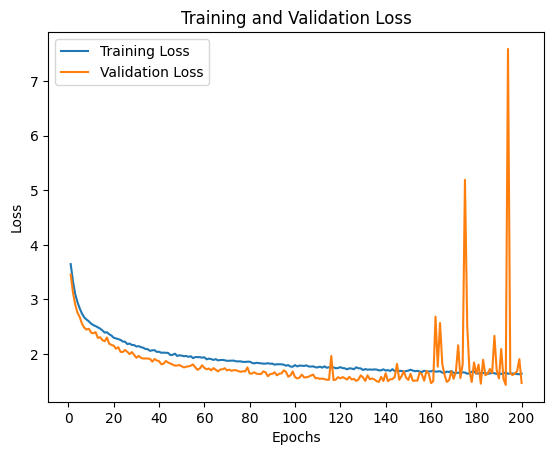

In [35]:
epochs = range(1, 201)
print(len(epochs))
# Plot and label the training and validation loss values
plt.plot(epochs, train_values, label='Training Loss')
plt.plot(epochs, val_values, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(np.arange(0, 201, 20))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [36]:
train_acc_values = torch.stack(loaded_results['train_acc']).tolist()
val_acc_values = torch.stack(loaded_results['val_acc']).tolist()
print(len(train_acc_values))
print(len(val_acc_values))

200
200


200


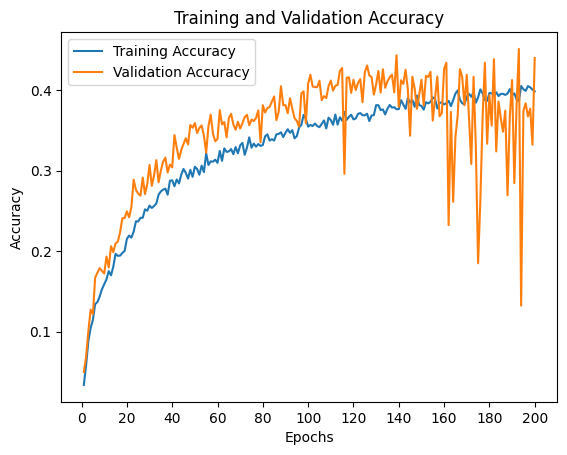

In [38]:
epochs = range(1, 201)
print(len(epochs))
# Plot and label the training and validation accuracy values
plt.plot(epochs, train_acc_values, label='Training Accuracy')
plt.plot(epochs, val_acc_values, label='Validation Accuracy')
 
# Add in a title and axes labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
 
# Set the tick locations
plt.xticks(np.arange(0, 201, 20))
 
# Display the plot
plt.legend(loc='best')
plt.show()